In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marvel-vs-dc/db.csv


# Marvel vs DC: A Data-Driven Showdown at the Box Office


In [36]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("leonardopena/marvel-vs-dc")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/marvel-vs-dc


# EDA

In [37]:
#read in the data frame
df = pd.read_csv('/kaggle/input/marvel-vs-dc/db.csv',encoding='latin1')
df.head(39)

,Unnamed: 0,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
0,1,Iron Man,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247
1,2,The Incredible Hulk,Marvel,6.7,61,112,2008,150000000,55414050,134806913,263427551
2,3,Iron Man 2,Marvel,7.0,57,124,2010,200000000,128122480,312433331,623933331
3,4,Thor,Marvel,7.0,57,115,2011,150000000,65723338,181030624,449326618
4,5,Captain America: The First Avenger,Marvel,6.9,66,124,2011,140000000,65058524,176654505,370569774
5,6,The Avengers,Marvel,8.0,69,143,2012,220000000,207438708,623357910,1518812988
6,7,Iron Man Three,Marvel,7.2,62,130,2013,200000000,174144585,409013994,1214811252
7,8,Thor: The Dark World,Marvel,6.9,54,112,2013,170000000,85737841,206362140,644783140
8,9,Captain America: The Winter Soldier,Marvel,7.7,70,136,2014,170000000,95023721,259766572,714421503
9,10,Guardians of the Galaxy,Marvel,8.0,76,121,2014,170000000,94320883,333176600,772776600


In [38]:
# Basic informationprint("Shape:", df.shape)
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)

# Check for missing values (NaNs)print("\nMissing Values:\n", df.isnull().sum())
print("\nMissing Values:\n", df.isnull().sum())

# Check for empty strings in object-type columnsfor colin df.select_dtypes(include=['object']).columns:
# Count empty strings (after stripping whitespace)empty_count= (df[col].str.strip()== '').sum()
for col in df.select_dtypes(include='object').columns:
    empty_count = (df[col].str.strip() == '').sum()
    print(f"Empty strings in '{col}': {empty_count}")

# Check for zeros in numeric columns numeric_cols= df.select_dtypes(include=[np.number]).columns
for col in df.select_dtypes(include='number').columns:
    zero_count = (df[col] == 0).sum()
    print(f"Zeros in '{col}': {zero_count}")

# Descriptive statistics (all columns)print("\nDescriptive Statistics:")
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

# Check for duplicate rowsduplicate_count= df.duplicated().sum()
duplicate_count = df.duplicated().sum()
print("\nDuplicate rows:", duplicate_count)

# Unique value counts for each columnprint("\nUnique value counts:")
print("\nUnique value counts:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Shape: (39, 11)
Columns: ['Unnamed: 0', 'Original Title', 'Company', 'Rate', 'Metascore', 'Minutes', 'Release', 'Budget', 'Opening Weekend USA', 'Gross\xa0USA', 'Gross Worldwide']

Data Types:
 Unnamed: 0               int64
Original Title          object
Company                 object
Rate                   float64
Metascore                int64
Minutes                 object
Release                  int64
Budget                  object
Opening Weekend USA      int64
Gross USA                int64
Gross Worldwide          int64
dtype: object

Missing Values:
 Unnamed: 0             0
Original Title         0
Company                0
Rate                   0
Metascore              0
Minutes                0
Release                0
Budget                 0
Opening Weekend USA    0
Gross USA              0
Gross Worldwide        0
dtype: int64
Empty strings in 'Original Title': 0
Empty strings in 'Company': 0
Empty strings in 'Minutes': 0
Empty strings in 'Budget': 0
Zeros in 'Unnamed: 

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [39]:
#remove white space
df['Minutes'] = df['Minutes'].astype(str).str.strip()
df['Budget'] = df['Budget'].astype(str).str.strip()

#convert Minuets and Budget to type Int from type object
df['Minutes'] = pd.to_numeric(df['Minutes'])  # will raise if non-numeric
df['Budget'] = pd.to_numeric(df['Budget'])

#rename Gross\xa0USA col
df.rename(columns={'Gross\xa0USA': 'Gross USA'},inplace=True)
print("\nData Types:\n", df.dtypes)


Data Types:
 Unnamed: 0               int64
Original Title          object
Company                 object
Rate                   float64
Metascore                int64
Minutes                  int64
Release                  int64
Budget                   int64
Opening Weekend USA      int64
Gross USA                int64
Gross Worldwide          int64
dtype: object


In [40]:
#rename the `Unnamed: 0` col to `Index`
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)
df.head()

,Index,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
0,1,Iron Man,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247
1,2,The Incredible Hulk,Marvel,6.7,61,112,2008,150000000,55414050,134806913,263427551
2,3,Iron Man 2,Marvel,7.0,57,124,2010,200000000,128122480,312433331,623933331
3,4,Thor,Marvel,7.0,57,115,2011,150000000,65723338,181030624,449326618
4,5,Captain America: The First Avenger,Marvel,6.9,66,124,2011,140000000,65058524,176654505,370569774


## Lets Find out how many Marvel and DC movies are in the data set

In [41]:
marvel = df[df['Company']=='Marvel']
dc = df[df['Company']=='DC']
marvel_count = len(marvel)
dc_count = len(dc)
print('There are',marvel_count, 'Marvel movies and',dc_count,'DC movies from 2000 to 2019')

There are 23 Marvel movies and 16 DC movies from 2000 to 2019


## What are the average rating, Metascore, runtime, and budget for each company?

In [42]:
marvel_avg = marvel.agg({'Minutes':'mean','Budget':'mean','Metascore':'mean','Rate':'mean'})
dc_avg = dc.agg({'Minutes':'mean','Budget':'mean','Metascore':'mean','Rate':'mean'})
print('****Marvel Avg*****\n', marvel_avg.apply(lambda x: f"{x:.2f}"))
print('****DC Avg*****\n', dc_avg.apply(lambda x: f"{x:.2f}"))


****Marvel Avg*****
 Minutes            130.26
Budget       192782608.70
Metascore           68.65
Rate                 7.48
dtype: object
****DC Avg*****
 Minutes            134.12
Budget       171625000.00
Metascore           56.50
Rate                 6.81
dtype: object


# 💰 Box Office Performance
## Which company has the highest average worldwide gross?

In [43]:
# For this we will use the marvel and DC data frames we created in the last question
marvel_avg_gross = marvel['Gross Worldwide'].mean().round(2)
dc_avg_gross = dc['Gross Worldwide'].mean().round(2)
dc_formatted = f"{dc_avg_gross:,.2f}"
marvel_formatted = f"{marvel_avg_gross:,.2f}"
print("Marvel hand an average gross of",marvel_formatted, "while DC had an average gross of", dc_formatted)

Marvel hand an average gross of 981,965,740.61 while DC had an average gross of 605,632,646.00


## Bar chart of Average world wide gross

Text(0.5, 1.0, 'Average world wide gross')

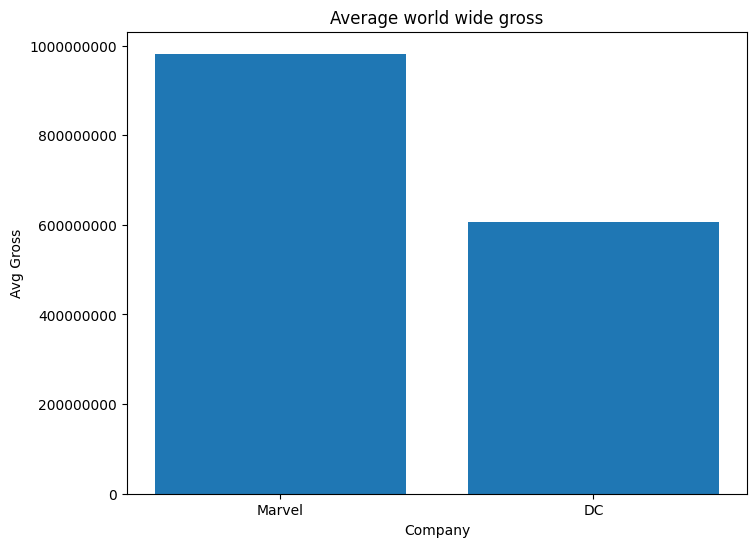

In [44]:
import matplotlib.pyplot as plt
#create a series to be able to plot
avg_gross = pd.Series([marvel_avg_gross, dc_avg_gross], index=['Marvel', 'DC'])

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(avg_gross.index, avg_gross.values)
ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('Company')
ax.set_ylabel('Avg Gross')
ax.set_title('Average world wide gross')

## Comparing Average Worldwide Gross: Marvel vs. DC
This bar chart highlights the difference in average worldwide gross revenue between Marvel and DC movies in the dataset.

* Marvel films earned an average of $981,965,740.61

* DC films earned an average of $605,632,646.00

This suggests that, on average, Marvel movies outperformed DC movies at the global box office.

## How does USA Opening Weekend → USA Total Gross performance differ between Marvel and DC?

In [45]:
#Total ratio between USA opening weekend -> USA total Gross
gross_USA = df['Gross USA'].sum()
opening_USA = df['Opening Weekend USA'].sum()
total_ratio = (opening_USA/gross_USA).round(3)
print(total_ratio)

0.356


In [46]:
#Marvel ratio between USA opening weekend -> USA total Gross
gross_USA = marvel['Gross USA'].sum()
opening_USA = marvel['Opening Weekend USA'].sum()
marvel_total_ratio = (opening_USA/gross_USA).round(3)
print(marvel_total_ratio)

0.364


In [47]:
#DC ratio between USA opening weekend -> USA total Gross
gross_USA = dc['Gross USA'].sum()
opening_USA = dc['Opening Weekend USA'].sum()
dc_total_ratio = (opening_USA/gross_USA).round(3)
print(dc_total_ratio)

0.34


## Opening gross per year for Marvel Vs. DC

/tmp/ipykernel_31/1884030465.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.text(x, y, f'{int(y):,}', fontsize=8, ha='center', va='bottom')
/tmp/ipykernel_31/1884030465.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.text(x, y, f'{int(y):,}', fontsize=8, ha='center', va='bottom')


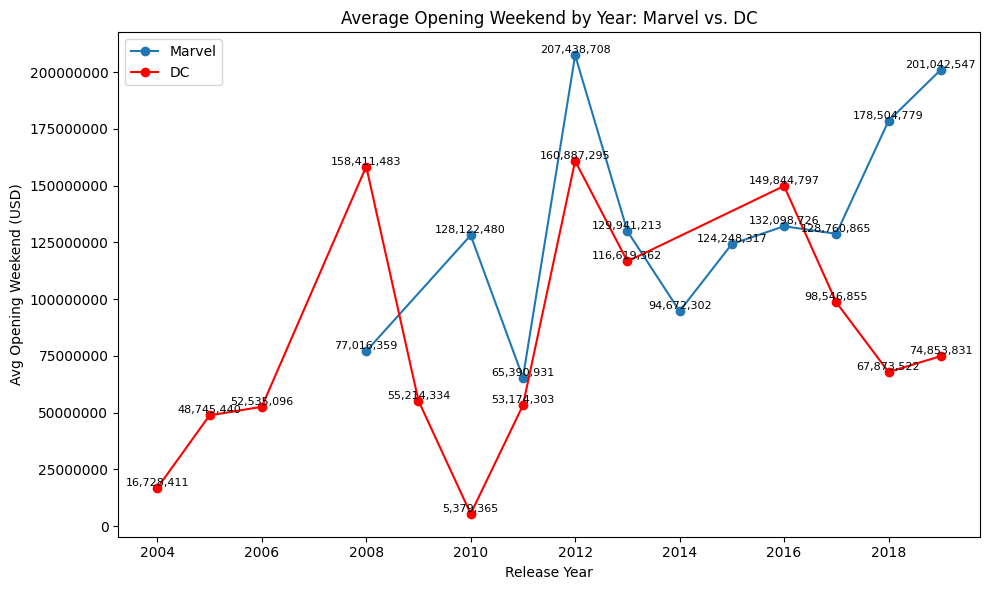

In [48]:
marvel_trend = marvel.groupby('Release').agg({'Opening Weekend USA':'mean'})
dc_trend = dc.groupby('Release').agg({'Opening Weekend USA':'mean'})

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Marvel
ax.plot(marvel_trend.index, marvel_trend.values, marker='o', label='Marvel')
for x, y in zip(marvel_trend.index, marvel_trend.values):
    ax.text(x, y, f'{int(y):,}', fontsize=8, ha='center', va='bottom')

# Plot DC
ax.plot(dc_trend.index, dc_trend.values, marker='o', color='r', label='DC')
for x, y in zip(dc_trend.index, dc_trend.values):
    ax.text(x, y, f'{int(y):,}', fontsize=8, ha='center', va='bottom')

# Labels and title
ax.set_xlabel('Release Year')
ax.set_ylabel('Avg Opening Weekend (USD)')
ax.set_title('Average Opening Weekend by Year: Marvel vs. DC')
ax.ticklabel_format(style='plain', axis='y')
ax.legend()
plt.tight_layout()


## Marvel vs. DC: Opening Weekend Trends Over Time
This line chart compares the average opening weekend earnings for Marvel and DC movies over the years.

* Marvel shows a generally upward trend, starting at `$77M` in 2008 and reaching $201M in 2019, reflecting growing anticipation and audience reach.

* DC's trend is more erratic — beginning with `$16M` in 2004, peaking at `$158M` in 2008, dropping to `$5M` in 2010, then surging to `$160M` in 2010, and finally landing around `$67.8M` in 2018 and $74.8M in 2019.

This comparison reveals Marvel's steadier growth and stronger box office consistency compared to DC's more volatile performance.

## Top 3 grossing movies for each company (USA and worldwide)

In [49]:
usa_marvel = marvel.sort_values('Gross USA',ascending=False)[['Original Title','Gross USA']].head(3).reset_index(drop=True)
usa_dc = dc.sort_values('Gross USA',ascending=False)[['Original Title','Gross USA']].head(3).reset_index(drop=True)
world_marvel = marvel.sort_values('Gross Worldwide',ascending=False)[['Original Title','Gross Worldwide']].head(3).reset_index(drop=True)
world_dc = dc.sort_values('Gross Worldwide',ascending=False)[['Original Title','Gross Worldwide']].head(3).reset_index(drop=True)
print("\nThe top 3 grossing Movies for Marvel in the USA are\n", usa_marvel)
print("\nThe top 3 grossing Movies for DC in the USA are\n", usa_dc)
print("\nThe top 3 grossing Movies for Marvel in the World are\n", world_marvel)
print("\nThe top 3 grossing Movies for DC in the World are\n", world_dc)


The top 3 grossing Movies for Marvel in the USA are
            Original Title  Gross USA
0       Avengers: Endgame  858373000
1           Black Panther  700059566
2  Avengers: Infinity War  678815482

The top 3 grossing Movies for DC in the USA are
           Original Title  Gross USA
0        The Dark Knight  535234033
1  The Dark Knight Rises  448139099
2           Wonder Woman  412563408

The top 3 grossing Movies for Marvel in the World are
            Original Title  Gross Worldwide
0       Avengers: Endgame       2797800564
1  Avengers: Infinity War       2048359754
2            The Avengers       1518812988

The top 3 grossing Movies for DC in the World are
           Original Title  Gross Worldwide
0                Aquaman       1148161807
1  The Dark Knight Rises       1081041287
2                  Joker       1060504580


**Top Grossing Movies for Marvel and DC**

**Top 3 Grossing Movies for Marvel in the USA**

1. Avengers: Endgame - $858,373,000

2. Black Panther - $700,059,566

3. Avengers: Infinity War - $678,815,482

**Top 3 Grossing Movies for DC in the USA**

1. The Dark Knight - $535,234,033

2. The Dark Knight Rises - $448,139,099

3. Wonder Woman - $412,563,408

**Top 3 Grossing Movies for Marvel Worldwide**

1. Avengers: Endgame - $2,797,800,564

2. Avengers: Infinity War - $2,048,359,754

3. The Avengers - $1,518,812,988

**Top 3 Grossing Movies for DC Worldwide**

1. Aquaman - $1,148,161,807

2. The Dark Knight Rises - $1,081,041,287

3. Joker - $1,060,504,580

This analysis highlights the performance of Marvel and DC films in both the U.S. and worldwide box office,

## 🎬 Critical Reception
Are higher-rated Marvel or DC movies more financially successful?

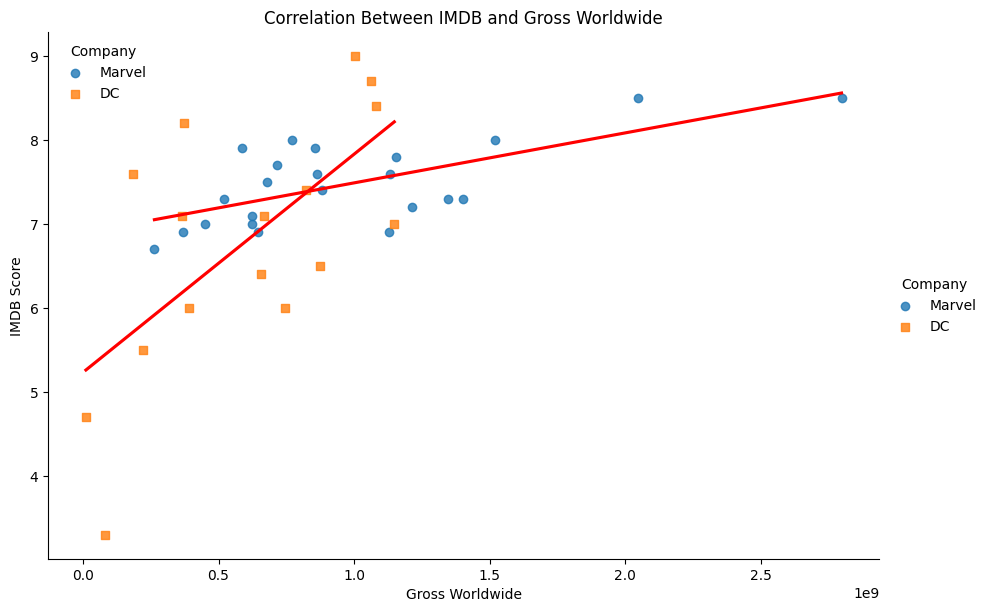

In [50]:
#import seaborn as sns
import seaborn as sns

# Using sns.lmplot for separate regression plots based on the 'Company' column
sns.lmplot(x='Gross Worldwide', y='Rate', data=df, hue='Company', 
           aspect=1.5, height=6, markers=["o", "s"], ci=None, line_kws={'color': 'red'})

# Customizing title and labels
plt.title('Correlation Between IMDB and Gross Worldwide')
plt.xlabel('Gross Worldwide')
plt.ylabel('IMDB Score')

# Show legend and adjust the plot
plt.legend(title="Company", loc='upper left', frameon=False)
plt.show()



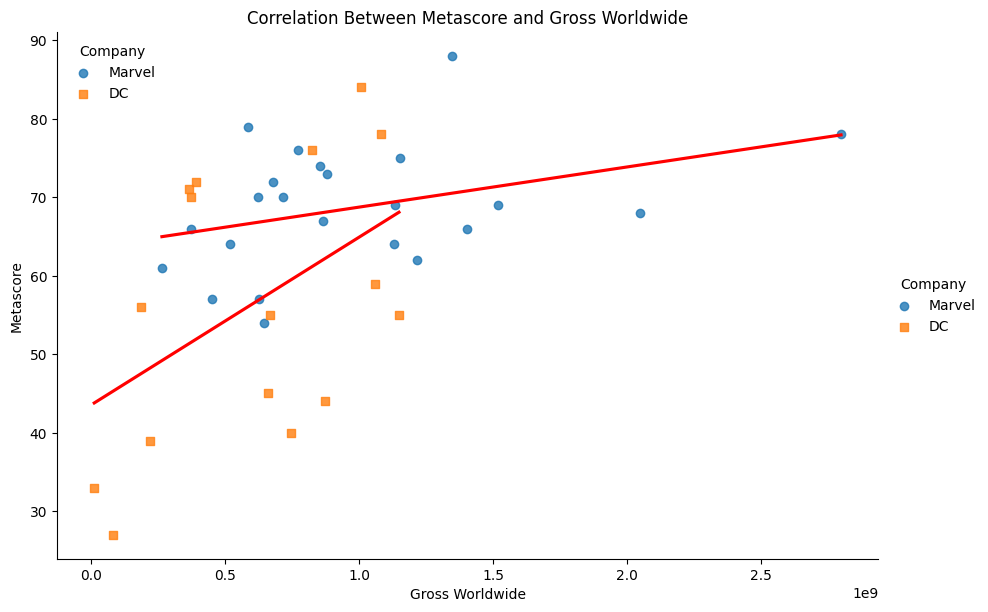

In [51]:
# Using sns.lmplot for separate regression plots based on the 'Company' column
sns.lmplot(x='Gross Worldwide', y='Metascore', data=df, hue='Company', 
           aspect=1.5, height=6, markers=["o", "s"], ci=None, line_kws={'color': 'red'})

# Customizing title and labels
plt.title('Correlation Between Metascore and Gross Worldwide')
plt.xlabel('Gross Worldwide')
plt.ylabel('Metascore')

# Show legend and adjust the plot
plt.legend(title="Company", loc='upper left', frameon=False)
plt.show()

Looking at the scatter plot, we can clearly see a positive correlation between movie ratings and gross worldwide earnings. The trend line indicates that as the rating increases, the gross worldwide revenue tends to rise for both Marvel and DC. While there are some outliers, the overall pattern holds true: the higher the rating, the more financially successful the movie is. This trend is evident for both Marvel and DC movies.

# 📈 Trends Over Time
How have budget and box office earnings changed over the years for each studio?

In [52]:
marvel_box = marvel.groupby('Release').agg({'Budget':'mean','Gross Worldwide':'sum'}).reset_index()
dc_box = dc.groupby('Release').agg({'Budget':'mean','Gross Worldwide':'sum'}).reset_index()

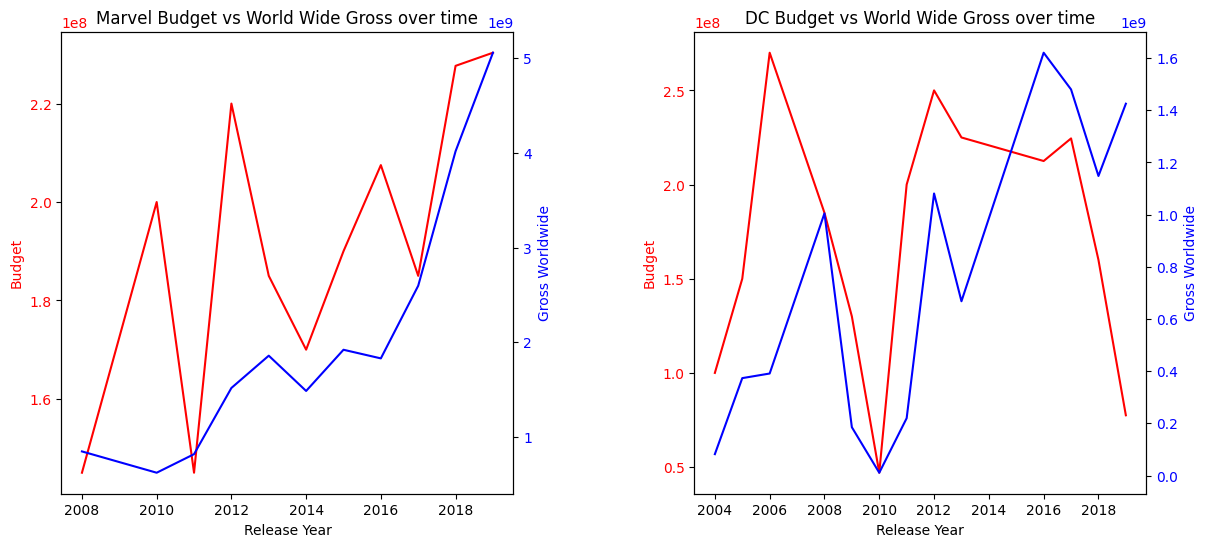

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # Adjusted figsize for more space

# Plot for Marvel
ax[0].plot(marvel_box['Release'], marvel_box['Budget'], color='r', label='Budget')  # Plot Budget
ax[0].set_xlabel('Release Year')  # Label for the x-axis
ax[0].set_ylabel('Budget', color='r')  # Label for the left y-axis (Budget)
ax[0].tick_params(axis='y', labelcolor='r')  # Set color of y-axis ticks to red
ax[0].set_title('Marvel Budget vs World Wide Gross over time')

# Create a second y-axis for Gross Worldwide (Marvel)
ax2 = ax[0].twinx()
ax2.plot(marvel_box['Release'], marvel_box['Gross Worldwide'], color='b', label='Gross Worldwide')  # Plot Gross Worldwide
ax2.set_ylabel('Gross Worldwide', color='b')  # Label for the right y-axis (Gross Worldwide)
ax2.tick_params(axis='y', labelcolor='b')  # Set color of y-axis ticks to blue

# Plot for DC
ax[1].plot(dc_box['Release'], dc_box['Budget'], color='r', label='Budget')  # Plot Budget
ax[1].set_xlabel('Release Year')  # Label for the x-axis
ax[1].set_ylabel('Budget', color='r')  # Label for the left y-axis (Budget)
ax[1].tick_params(axis='y', labelcolor='r')  # Set color of y-axis ticks to red
ax[1].set_title('DC Budget vs World Wide Gross over time')

# Create a second y-axis for Gross Worldwide (DC)
ax2_dc = ax[1].twinx()  # Renamed ax2_dc to avoid overwriting
ax2_dc.plot(dc_box['Release'], dc_box['Gross Worldwide'], color='b', label='Gross Worldwide')  # Plot Gross Worldwide
ax2_dc.set_ylabel('Gross Worldwide', color='b')  # Label for the right y-axis (Gross Worldwide)
ax2_dc.tick_params(axis='y', labelcolor='b')  # Set color of y-axis ticks to blue

# Rotate x-tick labels for both plots
plt.xticks(rotation=90)

plt.subplots_adjust(wspace=0.4)  # Adjusted spacing for better visual separation
plt.show()  # Display the plot



**Marvel:**

This chart shows a clear upward trend for Marvel in both budget and total gross over time. Starting in 2008, the budget was just over `$140 million`, while the total gross was around `$1 billion`. Fast forward to 2019, where the budget increased to `$260 million`, and the gross reached approximately `$5 billion`. This shows a strong positive correlation between the budget and the total gross, indicating that as Marvel's budget increased, so did its total earnings.

**DC:**

The trend for DC is notably different. In the early years, DC's budget was high—over `$250 million` in the mid-2000s—but the gross earnings were relatively low, less than `$400 million`. In 2012, the budget remained high at around `$250 million`, but the gross increased to just over `$1 billion`. Unlike Marvel, there is no consistent positive correlation between the budget and the gross for DC, suggesting that the high budgets didn't always translate into similarly high earnings. The performance fluctuated significantly over time.

# Project Summary: Marvel vs. DC Movies - Financial & Critical Performance
1. Which Company Delivers Better ROI?
   
* Based on the analysis of average gross earnings and budgets, Marvel clearly delivers a better Return on Investment (ROI). Marvel's movies consistently show a positive correlation between the increasing budgets and higher gross earnings worldwide. This indicates that as Marvel's budget increases, its total earnings also rise proportionally, delivering a strong ROI.

* In contrast, DC does not exhibit a consistent positive correlation between budget and earnings. While some years show high earnings despite a high budget (e.g., 2012), other years, especially in the early stages, show that large budgets did not result in similarly large earnings. As a result, Marvel's ROI outperforms DC's.

2. Who Leads in Critical and Commercial Performance?

* Critical Performance:
Both Marvel and DC have high-rated movies, but Marvel generally receives higher ratings for its movies. The scatter plot analysis of ratings vs. gross earnings shows that Marvel's better-rated movies also tend to gross more, especially worldwide. DC movies, while successful, don't consistently show this pattern.

* Commercial Performance:
Marvel leads commercially, with significantly higher worldwide earnings. The top 3 highest-grossing movies for Marvel (e.g., Avengers: Endgame, Black Panther, and Avengers: Infinity War) all made over a billion dollars worldwide, compared to DC's top-grossing films (e.g., Aquaman, The Dark Knight Rises), which grossed less than Marvel's highest earners. Therefore, Marvel is the clear leader in commercial success.

3. Strategic Recommendations

* For Marvel: Marvel should continue its strategy of increasing its production budgets, as higher budgets have consistently led to higher commercial earnings. Given their strong critical reception and commercial success, investing in high-quality production will likely yield more successful and profitable movies. However, it’s important for Marvel to maintain consistent quality across its projects to avoid the pitfalls of overextending and diluting its brand.

* For DC: DC should focus on refining its budget allocation and creative direction. While some of its higher-budget films performed well (e.g., The Dark Knight series), the lack of consistent performance highlights the need for more strategic decisions regarding which films receive larger budgets. A more data-driven approach to budget allocation, along with focusing on improving critical reception (such as working on better scripts, direction, and character development), could help DC improve both its ROI and critical performance.

Additionally, DC may benefit from diversifying its franchise approach, exploring both standalone films and interconnected cinematic universes to balance commercial performance and creativity.